# Tensorflow - Models training process - Fourth Exercise (25 minutes)
@author Tomasz Skrzypczyk

# Data import

In [8]:
# do not modify this cell
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_iris()
columns = data.feature_names

X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Model definition

In [2]:
# do not modify this cell
model = tf.keras.Sequential([tf.keras.layers.Dense(3, input_shape=(4,))])

# Model compiling

What you have to do first is to **compile** your model. This is different than what you are used to using sklearn or even using other DeepLearning libraries.


The training procedure is as follows:
* define your model
* compile it
* train using fit method


```
compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    **kwargs
)
```

At this step you should at least pass the *loss* parameter. The loss function of your model. This could be 'mse' in case of a regression model or 'categorical_crossentropy' in case of the classification.

What you want to pass next is the *optimizer*. Setting the optimizer to 'adam' or using the default 'rmsprop' are frequent choices. You will learn about different optimizers later on.

The last important parameter to define are the *metrics*. You should always pass a list of metric's objects or strings. Ex. `metrics=["accuracy"]` or `metrics = ["mae"]`.





In [12]:
# compile your model, remember that this is a classification model
# define the 'adam' optimizer, use accuracy as a metric and set the loss to 'sparse_categorical_crossentropy'

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)


# Model training

fit method

```
fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

```

You really don't need to care about all the parameters!!

Tip: pass your validation data as a tuple (X,y) !!!

In [13]:
# run you training, pass the training data, training labels, validation data, set batch size to 32 and epochs to 100
history = model.fit( 
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.0,
    validation_data=(X_val,y_val),
    )

Epoch 1/100
4/4 [==============================] - 1s 73ms/step - loss: 3.6050 - accuracy: 0.4628 - val_loss: 3.5002 - val_accuracy: 0.4286
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 3.5721 - accuracy: 0.4628 - val_loss: 3.4286 - val_accuracy: 0.4286
Epoch 3/100
4/4 [==============================] - 0s 25ms/step - loss: 3.4665 - accuracy: 0.4711 - val_loss: 2.7426 - val_accuracy: 0.4286
Epoch 4/100
4/4 [==============================] - 0s 25ms/step - loss: 3.2795 - accuracy: 0.4793 - val_loss: 2.7350 - val_accuracy: 0.4286
Epoch 5/100
4/4 [==============================] - 0s 29ms/step - loss: 3.1969 - accuracy: 0.4793 - val_loss: 2.7260 - val_accuracy: 0.4286
Epoch 6/100
4/4 [==============================] - 0s 30ms/step - loss: 3.1771 - accuracy: 0.4793 - val_loss: 2.7156 - val_accuracy: 0.4286
Epoch 7/100
4/4 [==============================] - 0s 25ms/step - loss: 3.1527 - accuracy: 0.4876 - val_loss: 2.7025 - val_accuracy: 0.4286
Epoch 8/100
4/4 [===

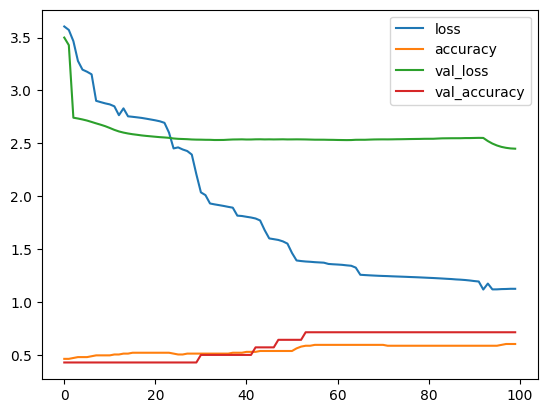

In [17]:
# if you create a dataframe using the history.history object you can easily plot the learning curves by using the plot method.
# Try it out

df = pd.DataFrame(history.history).plot()


# if you are not sure how to do it see the tutorial:
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

# Model usage

If you want to make predictions an the test set, simplu use the predict method.



```
predict(
    x,
    batch_size=None,
    verbose='auto',
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)
```

The only argument you should care about is the x - your data


In [14]:
# make predictions on the test set

predictions = model.predict(X_test)
predictions

1/1 [==============================] - 0s 84ms/step


array([[-0.686924  , -0.71169513, -0.19427107],
       [-0.728675  , -0.38090807, -0.07899484],
       [-0.9099096 ,  0.27367443,  0.5421647 ],
       [-1.3537246 , -0.16233219, -0.07784787],
       [ 0.9955201 , -0.3254558 , -0.3694456 ],
       [ 0.8818117 ,  0.6452556 , -0.13905177],
       [-0.07896984, -0.2651425 ,  0.06152007],
       [-0.7084749 , -0.10491687, -0.00302741],
       [ 0.96800375,  0.38558817, -0.04847112],
       [ 1.154377  ,  0.93748134, -0.17868564],
       [ 0.8123312 ,  0.4238475 ,  0.12956715],
       [ 0.9463315 ,  0.5964057 , -0.09394327],
       [ 0.7779085 ,  0.27480122, -0.25707528],
       [-0.065259  , -0.31285748, -0.08624646],
       [-1.132417  ,  0.45937723,  0.63702154]], dtype=float32)

# Model evaluation

To evaluate your model, use the evaluate method. It will print the loss function value first and the metrics you passed to the model while compiling it.


```
evaluate(
    x=None,
    y=None,
    batch_size=None,
    verbose='auto',
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
    **kwargs
)
```

Again, the only parameters you need to pass, and really care baout, are x and y






In [16]:
# evaluate your model using the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 60ms/step - loss: 1.5087 - accuracy: 0.8000


[1.5087318420410156, 0.800000011920929]